### Feature Engineering

In [59]:
from warnings import filterwarnings

filterwarnings("ignore")

### step 1 :- Data Ingection

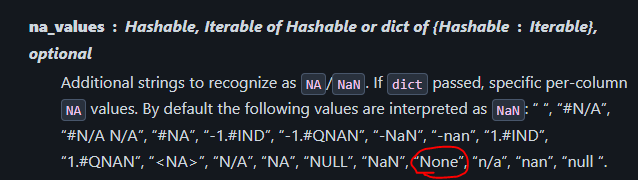

###

In [60]:
import pandas as pd

df = pd.read_csv("Cars93.csv", na_values=["", "NA"], keep_default_na=False)
df.head

<bound method NDFrame.head of     id Manufacturer    Model  ... Weight   Origin                Make
0    1        Acura  Integra  ...   2705  non-USA       Acura Integra
1    2        Acura   Legend  ...   3560  non-USA        Acura Legend
2    3         Audi       90  ...   3375  non-USA             Audi 90
3    4         Audi      100  ...   3405  non-USA            Audi 100
4    5          BMW     535i  ...   3640  non-USA            BMW 535i
..  ..          ...      ...  ...    ...      ...                 ...
89  90   Volkswagen   Passat  ...   2985  non-USA   Volkswagen Passat
90  91   Volkswagen  Corrado  ...   2810  non-USA  Volkswagen Corrado
91  92        Volvo      240  ...   2985  non-USA           Volvo 240
92  93        Volvo      850  ...   3245  non-USA           Volvo 850
93   1        Acura  Integra  ...   2705  non-USA       Acura Integra

[94 rows x 28 columns]>

### Target Feature :- Weight(Y)
Weight ~    Remaning Features

Step 2 :- Perform Basic Data quality checks

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  94 non-null     int64  
 1   Manufacturer        94 non-null     object 
 2   Model               94 non-null     object 
 3   Type                94 non-null     object 
 4   Min.Price           94 non-null     float64
 5   Price               94 non-null     float64
 6   Max.Price           94 non-null     float64
 7   MPG.city            94 non-null     int64  
 8   MPG.highway         94 non-null     int64  
 9   AirBags             90 non-null     object 
 10  DriveTrain          94 non-null     object 
 11  Cylinders           94 non-null     object 
 12  EngineSize          94 non-null     float64
 13  Horsepower          94 non-null     int64  
 14  RPM                 94 non-null     int64  
 15  Rev.per.mile        94 non-null     int64  
 16  Man.trans.

In [62]:
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [63]:
m = [m > 0]

In [64]:
## Duplicates
df.duplicated().sum()

np.int64(1)

In [65]:
# Drop the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [66]:
df.shape

(93, 28)

### Step 3 :- Separating X & Y(Weight)
Columns like id will not impact target feature

In [67]:
X = df.drop(columns=["id", "Weight"])
Y = df[["Weight"]]

In [68]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [69]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Step 4 :- Data Cleaning
(Handling Missing Values)
1. Categorical (Text) - Mode(Most Frequently)
2. Continuous (Numerical) - Mean / Median

In [70]:
X.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Origin', 'Make'],
      dtype='object')

In [71]:
X.dtypes

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Origin                 object
Make                   object
dtype: object

In [72]:
categorical_cols = list(X.columns[X.dtypes == "object"])
categorical_cols

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [73]:
continuous_cols = list(X.columns[X.dtypes != "object"])
continuous_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [74]:
df["AirBags"].mode()[0]

'Driver only'

In [75]:
df["AirBags"].value_counts()

AirBags
Driver only           42
None                  33
Driver & Passenger    14
Name: count, dtype: int64

In [76]:
df["Luggage.room"].mean()

np.float64(13.890243902439025)

In [77]:
df["Luggage.room"].median()

np.float64(14.0)

In [78]:
def replacer(df):
    categorical_cols = list(df.columns[df.dtypes == "object"])
    for col in df.columns:

        if col in categorical_cols:
            mode = df[col].mode()[0]
            df[col] = df[col].fillna(mode)
        else:
            median = df[col].median()
            df[col] = df[col].fillna(median)

            print("Missing Values replaced")

In [79]:
X.isna().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Origin                 0
Make                   0
dtype: int64

In [80]:
replacer(X)

Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced


In [81]:
X.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Origin                0
Make                  0
dtype: int64

In [82]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver only,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [83]:
X.to_csv("Cleaned.csv", index=False)

## Preprocessing
1. Categorical - OneHotEncoding
2. Continuous - StandardScalar

In [84]:
categorical_cols

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [85]:
continuous_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [86]:
X_cat = [categorical_cols]
X_cat

[['Manufacturer',
  'Model',
  'Type',
  'AirBags',
  'DriveTrain',
  'Cylinders',
  'Man.trans.avail',
  'Origin',
  'Make']]

In [87]:
X_con = X[continuous_cols]
X_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0
1,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0
2,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0
3,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0
4,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,16.6,19.7,22.7,17,21,2.5,109,4500,2915,21.1,7,187,115,72,38,34.0,14.0
89,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.0
90,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.0
91,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.0



### Apply One Hot encoding on Categorical features

In [88]:
from sklearn.preprocessing import OneHotEncoder

In [89]:
ohe = OneHotEncoder(
    handle_unknown="ignore", sparse_output=False, drop="first"
).set_output(transform="pandas")

X_cat_pre = ohe.fit_transform(X_cat)

In [90]:
X_cat_pre.head()

""
0


### Continuous cols Use StandardScaler

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler = StandardScaler().set_output(transform="pandas")

X_con_pre = scaler.fit_transform(X_con)

In [93]:
X_con_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.449727,-1.037572
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.740403,0.391972
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.060329,0.034586
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.080441,1.106743
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.279708,-0.322800


### Combining X_cat_pre and X_con_pre

In [94]:
X_pre = X_con_pre.join(X_cat_pre)
X_pre.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.449727,-1.037572
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.740403,0.391972
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.060329,0.034586
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.080441,1.106743
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.279708,-0.322800


### Step 5 :- Apply Train Test

Train :-  80% Test :- 20%

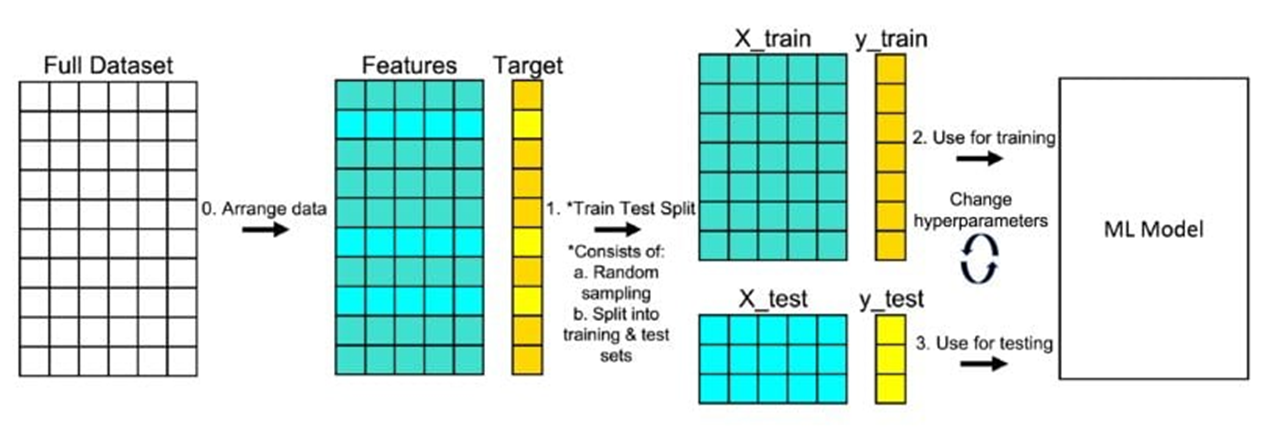

In [95]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=21
)

In [96]:
xtrain.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
57,1.365026,1.289670,1.185041,-0.423219,-0.016221,-0.356418,-0.265452,-0.304365,0.187910,-0.663618,-0.083243,-0.564892,0.155356,-0.632239,-1.546214,-0.619745,-0.680186
31,-1.003095,-0.979424,-0.911397,0.113500,0.172352,-0.841022,-0.323043,2.054464,0.157535,-1.062184,-0.083243,-0.840305,-0.876650,-0.632239,-0.922362,0.060329,-0.680186
62,0.606307,0.685966,0.729294,-0.781032,-0.959087,0.322027,1.116716,1.212025,-0.247462,0.716035,-0.083243,0.467905,0.450214,0.165927,1.261120,-0.109689,0.034586
29,0.043016,-0.021825,-0.063707,-0.423219,-0.204794,0.806631,1.347077,0.875050,-0.713210,0.409445,0.884457,1.294143,1.334791,1.230149,0.325342,0.740403,0.391972
51,1.985795,1.726835,1.449374,-0.781032,-0.581941,1.872759,1.270290,-1.146804,-0.996708,1.022624,0.884457,2.464647,1.924508,2.028316,1.884972,1.250459,2.893672


In [97]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [98]:
xtest.head()

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
23,-1.003095,-0.854520,-0.701753,0.113500,-0.016221,-0.453339,-0.975733,-0.809828,0.532158,-0.816912,-0.083243,-0.771452,-1.024079,-0.632239,-0.298510,-0.449727,-0.322800
86,0.203957,0.332071,0.428500,-0.781032,-1.336233,-0.259498,-0.111878,-0.472853,0.370159,0.961306,1.852158,0.261346,1.334791,0.431983,0.637268,2.440589,0.034586
91,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.356418,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.570385,0.034586
21,1.422504,1.039862,0.692834,-0.423219,-0.581941,0.612789,0.060893,-0.809828,-1.108083,-0.203734,0.884457,1.362996,0.892502,-0.100128,1.573046,2.780626,1.106743
17,0.100495,-0.073868,-0.209546,-0.959938,-0.581941,2.260442,0.502419,-1.820755,-1.988953,1.942392,0.884457,2.120381,1.777079,2.028316,0.949194,0.570385,2.178901


In [99]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


In [100]:
xtrain.shape

(74, 17)

In [101]:
xtest.shape

(19, 17)

### Step 6 - Model Evaluation

In [102]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [103]:
model.intercept_

array([3064.79118731])

In [104]:
model.coef_

array([[-2.51990217e+03,  5.61688895e+03, -3.22723206e+03,
         4.62255643e+01, -1.34915466e+02,  3.66073106e+01,
         1.39176392e+02, -3.52704255e+01,  6.32066497e+00,
         1.04445824e+02,  5.64887370e+01,  3.53566582e+01,
         2.14922975e+02,  4.91702818e+01, -2.25906142e+01,
        -5.92478126e+01,  3.93452604e+00]])

### Step 7 :- Model Evaluation

In [105]:
# R2 score in train
model.score(xtrain, ytrain)

0.9601591386489543

In [106]:
# R2 score in test
model.score(xtest, ytest)

0.9233277958548638

In [107]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)

In [108]:
def evaluate_model(model, x, y):
    # Predict the result for x
    ypred = model.predict(x)

    # Evaluate different metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print the metrics
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [109]:
print("Training Results : ")
evaluate_model(model, xtrain, ytrain)

Training Results : 
RMSE : 115.76
MAE : 89.85
MAPE : 3.03%
R2 : 96.02%


In [110]:
print("Testing Results : ")
evaluate_model(model, xtest, ytest)

Testing Results : 
RMSE : 166.76
MAE : 139.76
MAPE : 4.63%
R2 : 92.33%


In [111]:
ypred_train = model.predict(xtrain)
ypred_train[0:5]

array([[2966.43608537],
       [2516.97799384],
       [3422.23483481],
       [3665.28107781],
       [4056.64701238]])

In [112]:
ytrain.head()

,Weight
57,2920
31,2530
62,3730
29,3490
51,4055


In [113]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array([[2608.06817412],
       [3534.82588116],
       [2954.90641219],
       [3264.32997936],
       [4074.16743664]])

In [114]:
ytest.head()

,Weight
23,2670
86,3785
91,2985
21,3570
17,3910


### From above results it is clear that R2 score in test is greater than 80% hence model is good

### Step 8 - Out of Sample Prediction

In [119]:
xnew = pd.read_csv("sample.csv", na_values=["", "NA"], keep_default_na=False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,2.8,172,5500,2535,Yes,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,4,2.0,110,5200,2665,Yes,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,4,2.2,110,5200,2595,No,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,rotary,1.3,255,6500,2325,Yes,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,4,1.8,81,5500,2550,Yes,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [120]:
m2 = xnew.isna().sum()
m2[m2 > 0]

AirBags           1
Rear.seat.room    1
Luggage.room      1
dtype: int64

In [121]:
replacer(xnew)

Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced
Missing Values replaced


In [122]:
xnew.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Origin                0
Make                  0
dtype: int64

In [123]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,None,Front,6,2.8,172,5500,2535,Yes,15.0,6,190,106,65,37,31.00,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,4,2.0,110,5200,2665,Yes,15.2,5,181,101,66,39,25.00,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,4,2.2,110,5200,2595,No,16.5,6,198,108,71,40,28.50,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,rotary,1.3,255,6500,2325,Yes,20.0,2,169,96,69,37,27.25,14.5,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,4,1.8,81,5500,2550,Yes,12.4,4,163,93,63,34,26.00,10.0,non-USA,Volkswagen Fox


## transform new data with ohe and standardscaler


In [124]:
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [125]:
scaler

StandardScaler()

In [126]:
xnew_cat = xnew[categorical_cols]
xnew_con = xnew[continuous_cols]

In [127]:
xnew_cat

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Audi,100,Midsize,None,Front,6,Yes,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,None,Front,4,Yes,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,None,Front,4,No,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,Driver only,Rear,rotary,Yes,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,None,Front,4,Yes,non-USA,Volkswagen Fox


In [128]:
xnew_con

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,30.8,37.7,44.6,19,26,2.8,172,5500,2535,15.0,6,190,106,65,37,31.00,17.0
1,9.4,11.1,12.8,23,31,2.0,110,5200,2665,15.2,5,181,101,66,39,25.00,13.0
2,13.4,15.9,18.4,21,29,2.2,110,5200,2595,16.5,6,198,108,71,40,28.50,16.0
3,32.5,32.5,32.5,17,25,1.3,255,6500,2325,20.0,2,169,96,69,37,27.25,14.5
4,8.7,9.1,9.5,25,33,1.8,81,5500,2550,12.4,4,163,93,63,34,26.00,10.0


In [129]:
# Apply one hot encoding on categorical columns
xnew_cat_pre = ohe.transform(xnew_cat)
xnew_cat_pre

""
0
1
2
3
4


In [130]:
# Apply scaling on data
xnew_con_pre = scaler.transform(xnew_con)
xnew_con_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.080441,1.106743
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.959782,-0.322800
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.230348,0.749357
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.194699,0.213279
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.619745,-1.394958


In [131]:
# Combine preprocessed data
xnew_pre = xnew_con_pre.join(xnew_cat_pre)

In [132]:
xnew_pre

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,-0.510323,0.884457,0.467905,0.302785,-1.164350,-0.610436,1.080441,1.106743
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,-0.083243,-0.151773,-0.434362,-0.898295,0.013416,-0.959782,-0.322800
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,0.884457,1.018731,0.597644,0.431983,0.325342,0.230348,0.749357
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,-2.986345,-0.978011,-1.171509,-0.100128,-0.610436,-0.194699,0.213279
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,-1.050944,-1.391130,-1.613797,-1.696461,-1.546214,-0.619745,-1.394958


### Predict the weights

In [133]:
preds = model.predict(xnew_pre)
preds

array([[3156.10884194],
       [2775.01976443],
       [3167.38212869],
       [2995.99437426],
       [2171.00704375]])

### Save above in dataframe

In [134]:
xnew["Weight_pred"] = preds
xnew = xnew.round(2)

In [ ]:
xnew

In [135]:
xnew.to_csv("Results.csv", index=False)

### Step 9 - Save preprocessor and model object

In [149]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


d:\machine learnings\.venv\Scripts\python.exe: No module named pip


In [136]:
!uv add joblib

Resolved 53 packages in 4.20s
Audited 47 packages in 0.16ms


In [137]:
ohe

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [138]:
scaler

StandardScaler()

In [139]:
model

LinearRegression()

In [140]:
import joblib

joblib.dump(ohe, "ohe.joblib")

['ohe.joblib']

In [150]:
import joblib

joblib.dump(scaler, "scalar.joblib")

['scalar.joblib']

In [142]:
joblib.dump(model, "model.joblib")

['model.joblib']

### Load objects from file

In [144]:
o = joblib.load("ohe.joblib")
o

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [154]:
s = joblib.load("scalar.joblib")

In [146]:
m = joblib.load("model.joblib")
m

LinearRegression()

In [147]:
m.score(xtest, ytest)

0.9233277958548638